### Curso de Especialização em Big Data, Data Science e Data Analytics - 2020/2
# Deep Learning



## Dados do Grupo
### Grupo 4 :
*   Diogo Gnutzmann Santos
*   Emanuel Luz de Abreu
*   Lissandra Dutra da Silva
*   Rodrigo Michel
*   Vinícius Silva Salinas

# Objetivo
O objetivo desse trabalho é gerar nota IMDB de um filme baseado em features, utlizando a aprendizagem profunda de máquina.


# Problema 
O problema definidido consiste na necessidade de analisar os principais atributos dos filmes mais bem avaliados segundo suas respectivas notas IMDB, e calcular notas de filmes atuais ou futuros que ainda não possuem esta nota. A partir do problema evidenciado, a solução consiste em criar análises prévias sobre a base de dados e gerar a nota IMDB de um filme baseado em atributos (detalhados abaixo) do dataset escolhido.

# Dataset e Modelagem

O dataset escolhido é uma coleção de filmes encontrados nas seguintes plataformas de streaming: Netflix, Prime Video, Hulu e Disney+. O arquivo do dataset usado para o estudo está hospedado na plataforma Kaggle, no seguinte endereço:
https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney

As features são:
* ID;
* Title: título do filme;
* Year: ano que o filme foi lançado;
* Age: faixa etária;
* IMDb: base de dados online de informação sobre música, cinema, filmes, programas e comerciais para televisão e jogos de computador (*);
* Rotten Tomatoes: website americano, agregador de críticas de cinema e televisão (***);
* Netflix:	plataforma de streaming (**);
* Hulu: plataforma de streaming (**);
* Prime Video: plataforma de streaming (**);
* Disney+: plataforma de streaming (**);
* Type: classifica a obra em filme ou série, contudo, neste dataset há apenas filmes (***);
* Directors:	diretor do filme;
* Genres: gênero do filme;
* Country: país de origem do filme;
* Language: idioma de origem do filme;
* Runtime: duração do filme.

(*) Esta feature possui a nota dada pelo IMDb.

(*) Esta feature assume o valor 1 se o filme está disponível na plataforma de streamming e 0 em caso contrário.

(***) Esta feature será excluída da amostra de dados e não entrará nos estudos dessa tarefa.


# Pré-processamento e Transformação de Dados

O dataset foi no hospedado na plataforma GitHub, no seguinte endereço: https://raw.githubusercontent.com/rmicheldev/datasets/main/MoviesOnStreamingPlatforms_updated.csv. 

As técnicas de processamento e transformação de dados implementadas foram:
*   Exclusão da feature Rotten Tomatoes;
*   Exclusão da primeira feature de indice 0 pois não possuia valor;
*   Excusão da feature Type;
*   Item da lista;
*   Exclusão de todas as linhas cujas as features não possuem informação;
*   Renomeação de features.

Entre outras, que podem ser identificadas no código abaixo.



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

print(tf.__version__)

2.3.0


In [ ]:
link = "https://raw.githubusercontent.com/rmicheldev/datasets/main/MoviesOnStreamingPlatforms_updated.csv"

# Carrega o arquivo do github
rawDf = pd.read_csv(link)

In [ ]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [ ]:
#Mostra os tipos de dados e categorizando as features
rawDf.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

* Unnamed: 0           int64   Numerical
* ID                   int64   Numerical 
* Title               object   ????
* Year                 int64   Numerical 
* Age                 object   Categorical
* IMDb               float64   Numerical
* Rotten Tomatoes     object   Numerical
* Netflix              int64   Categorical
* Hulu                 int64   Categorical
* Prime Video          int64   Categorical
* Disney+              int64   Categorical
* Type                 int64   Categorical
* Directors           object   Categorical
* Genres              object   Categorical 
* Country             object   Categorical
* Language            object   Categorical 
* Runtime            float64   Numerical

In [ ]:
# Remove a primeira coluna (indice 0) que não possui valor e a coluna Type e a nota no Rotten Tomatoes 
explDf = rawDf.drop(rawDf.columns[[0]], axis=1).drop(['Type','Rotten Tomatoes'], axis=1)
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [ ]:
# Dropa todas as linhas que tem colunas faltando informação 
explDf = explDf.dropna()
display(explDf)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16726,16727,Richie Rich's Christmas Wish,1998,all,4.1,0,0,0,1,John Murlowski,"Comedy,Family",United States,English,84.0
16727,16728,The Jungle Book: Mowgli's Story,1998,all,4.2,0,0,0,1,Nick Marck,"Adventure,Family",United States,English,77.0
16737,16738,The Bears and I,1974,all,6.2,0,0,0,1,Bernard McEveety,"Drama,Family",United States,English,89.0
16738,16739,Whispers: An Elephant's Tale,2000,all,5.0,0,0,0,1,Dereck Joubert,"Adventure,Family",United States,English,72.0


In [ ]:
rawDf.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [ ]:
explDf.head(10)

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,1,0,1,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,1,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,1,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,1,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [ ]:
#renomeando colunas
colsRen = {'ID':'id',
        'Title':'title',
        'Year':'year',
        'Age':'age',
        'IMDb':'imdb',        
        'Netflix':'netflix',
        'Hulu':'hulu',
        'Prime Video':'prime',
        'Disney+':'disney',        
        'Directors':'directors',
        'Genres':'genres',
        'Country':'country',
        'Language':'language',
        'Runtime':'runtime'
        }


explDf = explDf.rename(columns = colsRen, inplace = False)
explDf.dtypes

id             int64
title         object
year           int64
age           object
imdb         float64
netflix        int64
hulu           int64
prime          int64
disney         int64
directors     object
genres        object
country       object
language      object
runtime      float64
dtype: object

# Análise do Dataset

Os comandos abaixo geram gráficos a fim da obtenção de análises sobre o dataset escolhido.

In [ ]:
# Classificando os 10 melhores titulos segundo a nota IMDb
titulo_imdb = explDf[['title','imdb']]
titulo_imdb = titulo_imdb.sort_values('imdb', ascending=[False])
titulo_imdb.head(10)

,title,imdb
7491,Finding Family,9.1
3560,The Dark Knight,9.0
4829,The Mountain II,8.9
6840,Peter Gabriel: Secret World Live,8.9
0,Inception,8.8
7643,Machine Gun Preacher Documentary,8.8
8247,Memories 677,8.8
4,"The Good, the Bad and the Ugly",8.8
9213,Street Dogs of South Central,8.8
5153,Anand,8.7


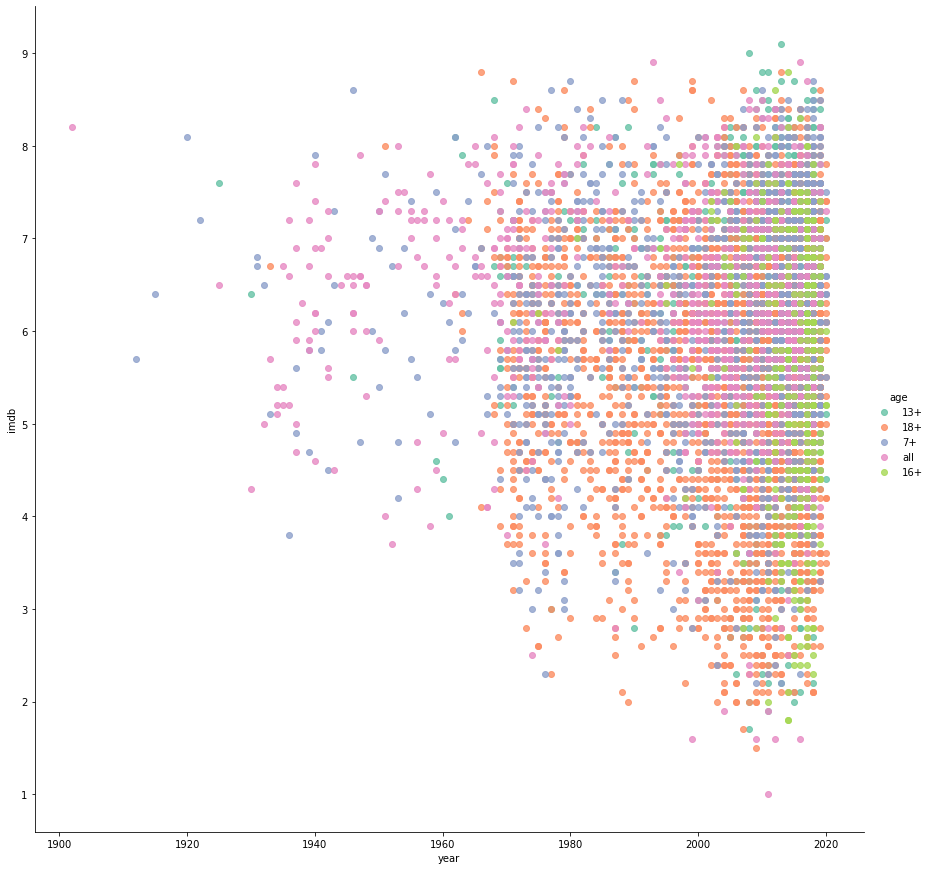

In [ ]:
# Gerando um grafico de dispersão de ano x nota IMDb, com coloracao de classificacao etaria, para analise dos anos com mais registros, com notas mais altas, de acordo com a classificacao etaria

# Tres variaveis no grafico de dispersao
sns.lmplot(x='year',y='imdb',data=explDf[['year','imdb','age']],fit_reg=False,hue='age',palette='Set2',height=12)

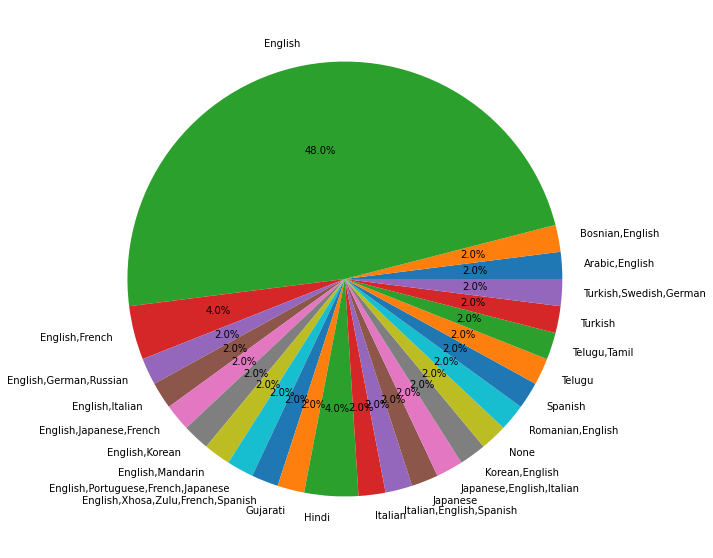

In [ ]:
# Grafico de pizza que evidencia as linguagens dos 50 melhores filmes com base na nota IMDb

lang_imdb = explDf[['language','imdb']]
lang_imdb = lang_imdb.sort_values('imdb', ascending=[False])
lang_imdb = lang_imdb.head(50)

fig = plt.figure(figsize=(10,10))

data = lang_imdb.groupby(['language'])['imdb'].count()
plt.pie(data, labels=data.index, autopct='%1.1f%%')

plt.show()

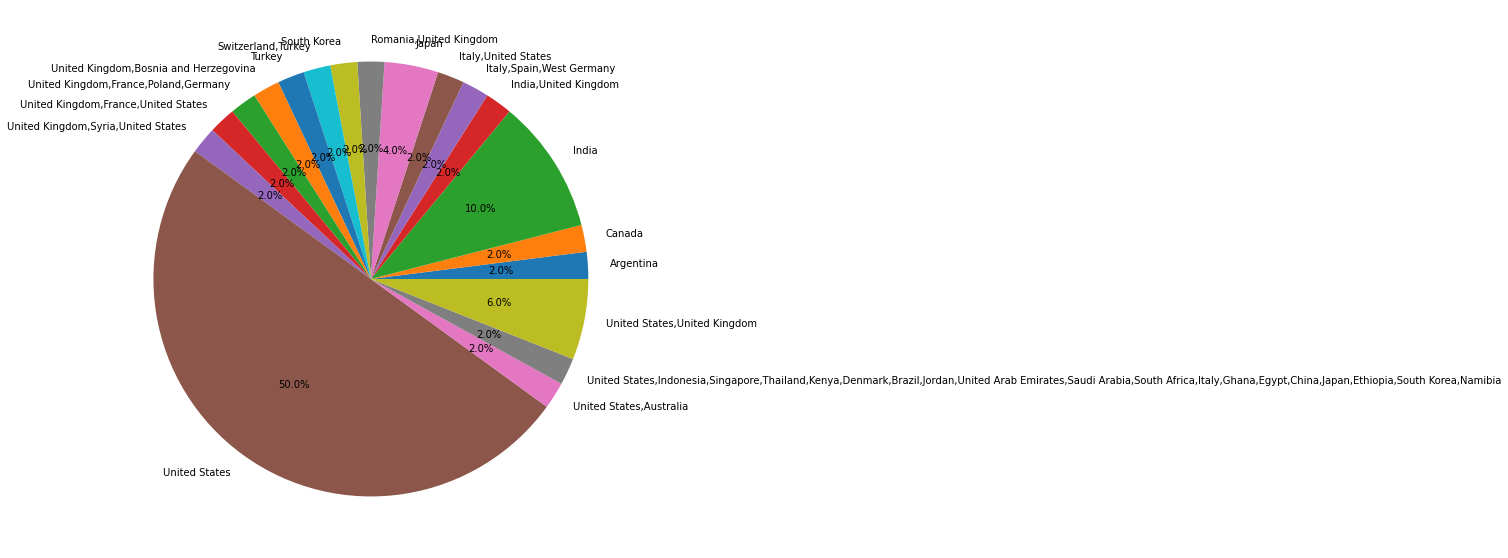

In [ ]:
# Grafico de pizza que evidencia os países dos 50 melhores filmes com base na nota IMDb

country_imdb = explDf[['country','imdb']]
country_imdb = country_imdb.sort_values('imdb', ascending=[False])
country_imdb = country_imdb.head(50)

fig = plt.figure(figsize=(10,10))

data = country_imdb.groupby(['country'])['imdb'].count()
plt.pie(data, labels=data.index, autopct='%1.1f%%')

plt.show()

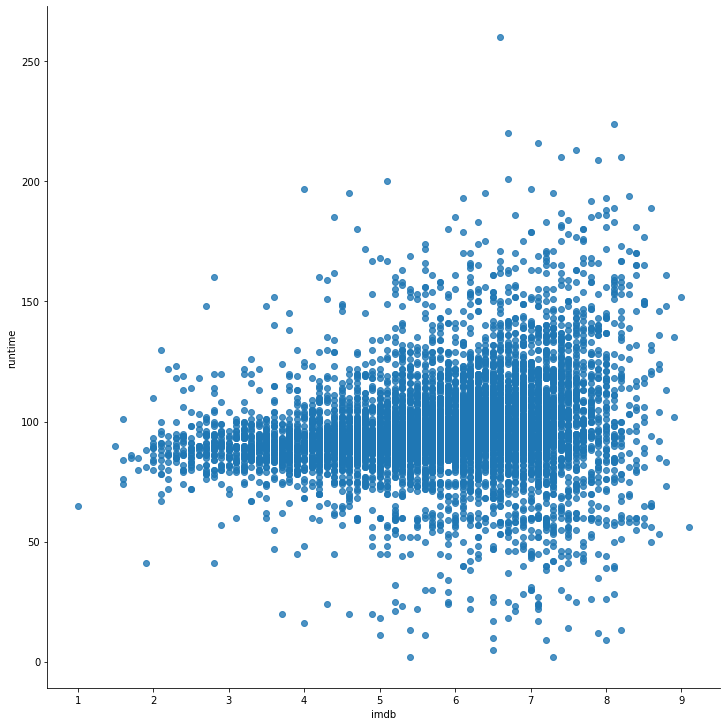

In [ ]:
# Gerando um grafico de dispersão de tempo do filme x nota IMDB para analise dos anos com mais registros e com notas mais altas
time_imdb = explDf[['runtime','imdb']]
time_imdb = time_imdb.sort_values('runtime', ascending=[True])
time_imdb = time_imdb.head(16000)
sns.lmplot(x='imdb',y='runtime',data=time_imdb[['imdb','runtime']],fit_reg=False,palette='Set2',height=10)

# 95 a 130 minutos

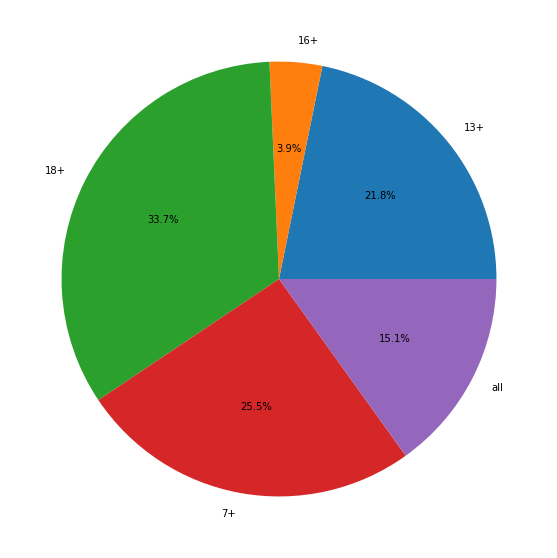

In [ ]:
# Grafico de pizza que evidencia a faixa etaria dos 1000 melhores filmes com base na nota IMDb

fage_imdb = explDf[['age','imdb']]
fage_imdb = fage_imdb.sort_values('imdb', ascending=[False])
fage_imdb = fage_imdb.head(1000)

fig = plt.figure(figsize=(10,10))

data = fage_imdb.groupby(['age'])['imdb'].count()
plt.pie(data, labels=data.index, autopct='%1.1f%%')

plt.show()

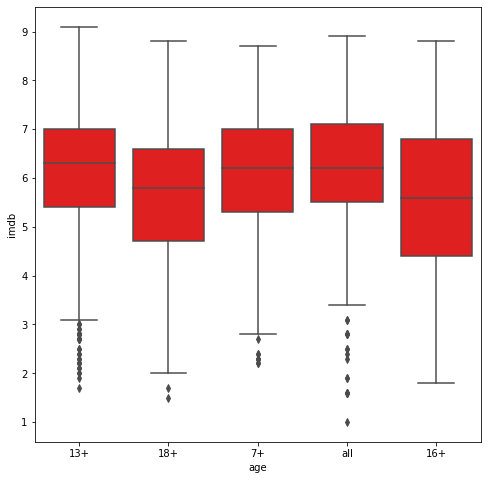

In [ ]:
# Boxplot das notas IMDb por classificacao etaria

fig = plt.figure(figsize=(8,8))

sns.boxplot(x='age',y='imdb',data=explDf,color='r')

,id,year,imdb,netflix,hulu,prime,disney,runtime
id,1.000000,-0.277241,-0.438533,-0.688974,-0.221221,0.389272,0.452224,-0.253546
year,-0.277241,1.000000,-0.031937,0.268979,0.120874,-0.226294,-0.109429,0.024250
imdb,-0.438533,-0.031937,1.000000,0.179462,0.076363,-0.238965,0.113032,0.204027
netflix,-0.688974,0.268979,0.179462,1.000000,-0.138557,-0.666071,-0.137916,0.139845
hulu,-0.221221,0.120874,0.076363,-0.138557,1.000000,-0.229738,-0.068469,0.014330
prime,0.389272,-0.226294,-0.238965,-0.666071,-0.229738,1.000000,-0.378683,-0.072729
disney,0.452224,-0.109429,0.113032,-0.137916,-0.068469,-0.378683,1.000000,-0.045231
runtime,-0.253546,0.024250,0.204027,0.139845,0.014330,-0.072729,-0.045231,1.000000


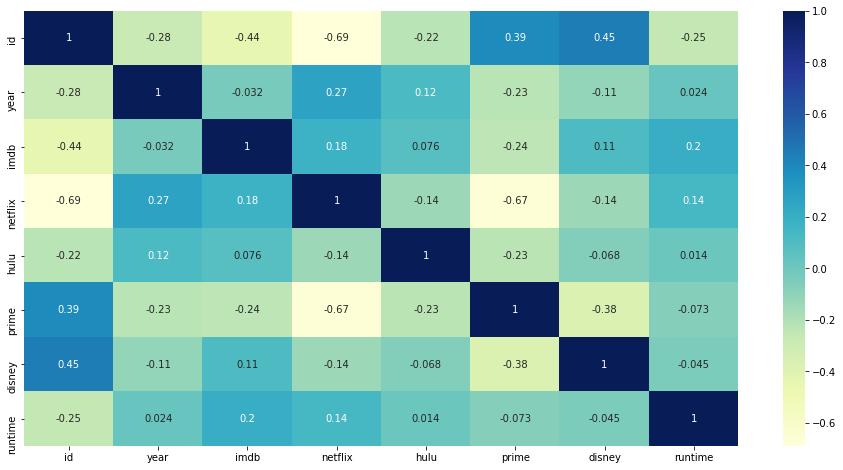

In [ ]:
# Matriz de correlacao das colunas numericas do dataset

plt.figure(figsize=(16,8))

correlacao = explDf.corr()
correlacao = (correlacao)
sns.heatmap(correlacao,xticklabels=correlacao.columns.values,yticklabels=correlacao.columns.values,annot=True,
            cmap="YlGnBu",linewidths=0)

correlacao


# Treinamento

Após os tratamentos dividimos os dados do dataset para treino e teste e começamos o treinamento como pode ser visto no código abaixo.



In [ ]:
#Dividindo os dados para treino e teste (validação)
testeDf = explDf.sample(frac=0.2, random_state=42)
treinoDf = explDf.drop(testeDf.index)

print("%d amostras para treino e %d para teste" % (len(treinoDf),len(testeDf)))

5637 amostras para treino e 1409 para teste


In [ ]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("imdb")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [ ]:
treinoDs = dataframe_to_dataset(treinoDf)
testeDs = dataframe_to_dataset(testeDf)

In [ ]:
#Estrutura do dataset
treinoDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [ ]:
testeDs.element_spec

({'age': TensorSpec(shape=(), dtype=tf.string, name=None),
  'country': TensorSpec(shape=(), dtype=tf.string, name=None),
  'directors': TensorSpec(shape=(), dtype=tf.string, name=None),
  'disney': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'genres': TensorSpec(shape=(), dtype=tf.string, name=None),
  'hulu': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'id': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'language': TensorSpec(shape=(), dtype=tf.string, name=None),
  'netflix': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'prime': TensorSpec(shape=(), dtype=tf.int64, name=None),
  'runtime': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'title': TensorSpec(shape=(), dtype=tf.string, name=None),
  'year': TensorSpec(shape=(), dtype=tf.int64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [ ]:
for x, y in treinoDs.take(2):
    print("Input:", x)
    print("Target:", y)

Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=9883>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'The Divine Tragedies'>, 'year': <tf.Tensor: shape=(), dtype=int64, numpy=2015>, 'age': <tf.Tensor: shape=(), dtype=string, numpy=b'7+'>, 'netflix': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hulu': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'prime': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'disney': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'directors': <tf.Tensor: shape=(), dtype=string, numpy=b'Jose Prendes'>, 'genres': <tf.Tensor: shape=(), dtype=string, numpy=b'Drama,Horror,Thriller'>, 'country': <tf.Tensor: shape=(), dtype=string, numpy=b'United States'>, 'language': <tf.Tensor: shape=(), dtype=string, numpy=b'English'>, 'runtime': <tf.Tensor: shape=(), dtype=float64, numpy=98.0>}
Target: tf.Tensor(3.4, shape=(), dtype=float64)
Input: {'id': <tf.Tensor: shape=(), dtype=int64, numpy=5707>, 'title': <tf.Tensor: shape=(), dtype=string, numpy=b'Winter Kills'>,

In [ ]:
treinoDs = treinoDs.batch(32)
testeDs = testeDs.batch(32)

### Treinado o modelo, podemos visualizar seu desempenho com os gráficos abaixo.

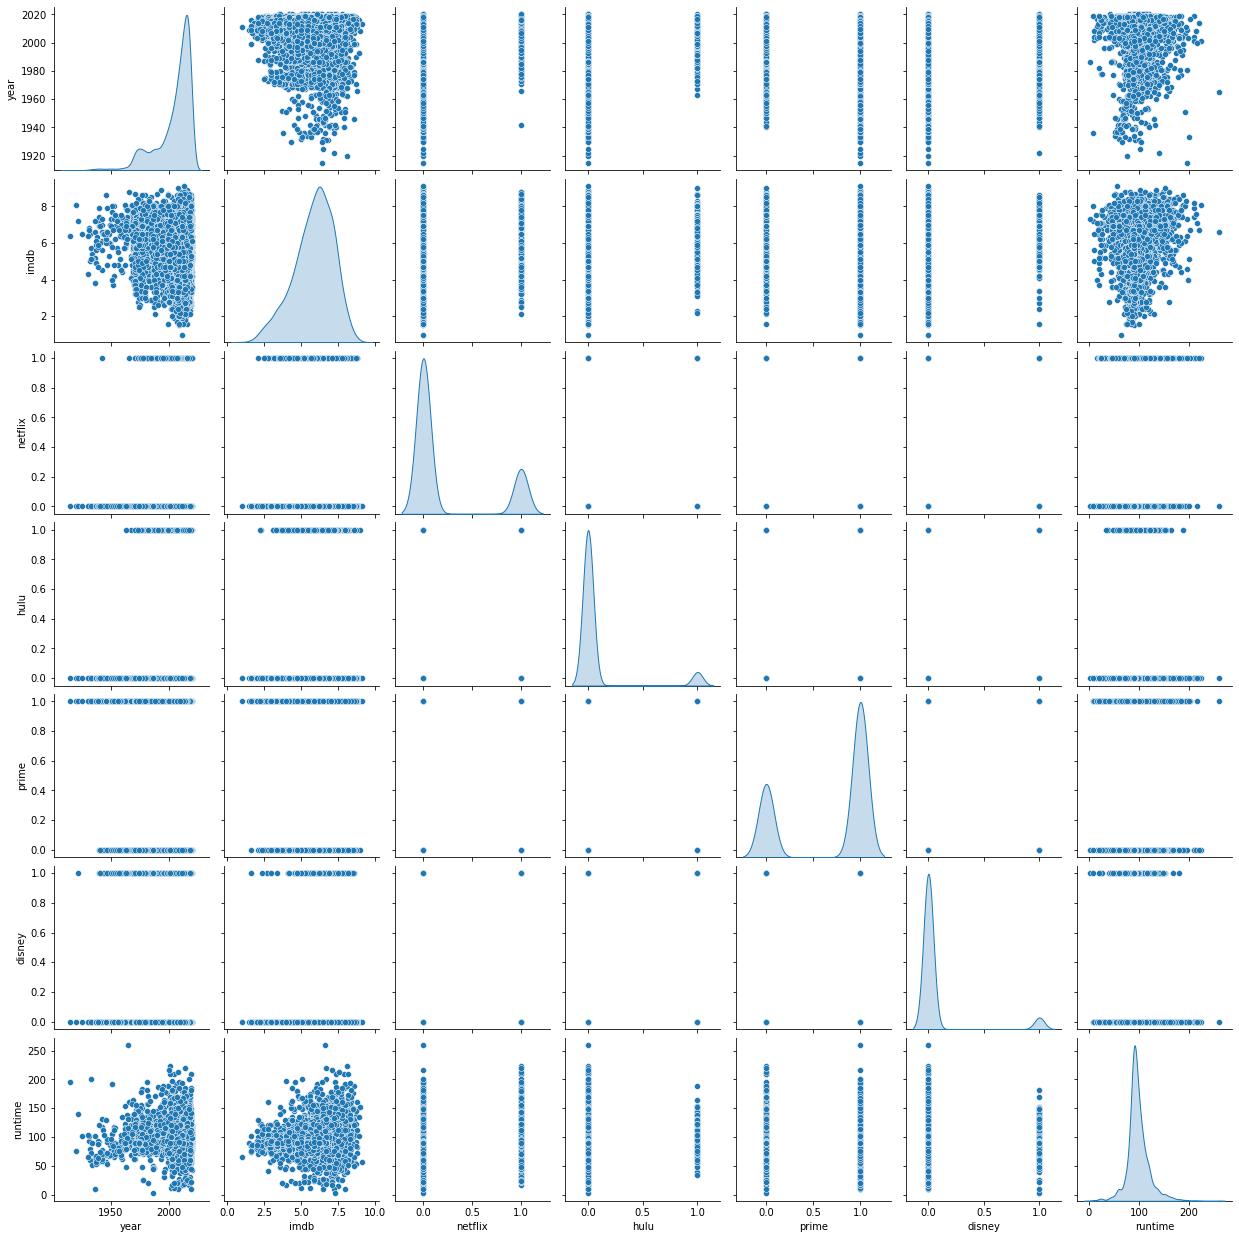

In [ ]:
sns.pairplot(treinoDf[["year","age","imdb","netflix","hulu","prime","disney","directors","genres","country","language","runtime"]], diag_kind="kde")



In [ ]:
# código retirado de https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature


In [ ]:
shp = (1,)

year =  keras.Input(shape=shp,name="year", dtype="int64") 
netflix =  keras.Input(shape=shp,name="netflix", dtype="int64")
hulu =  keras.Input(shape=shp,name="hulu", dtype="int64") 
prime =  keras.Input(shape=shp,name="prime", dtype="int64")
disney =  keras.Input(shape=shp,name="disney", dtype="int64")

runtime = keras.Input(shape=shp,name="runtime")

age = keras.Input(shape=shp,name="age", dtype="string")
directors = keras.Input(shape=shp,name="directors", dtype="string")
genres = keras.Input(shape=shp,name="genres", dtype="string")
country = keras.Input(shape=shp,name="country", dtype="string")
language = keras.Input(shape=shp,name="language", dtype="string")

In [ ]:
all_inputs = [
year,
netflix,
hulu,
prime,
disney,
runtime,
age,
directors,
genres,
country,
language
]

In [ ]:
year_encoded = encode_integer_categorical_feature(year, "year", treinoDs)
netflix_encoded = encode_integer_categorical_feature(netflix, "netflix", treinoDs)
hulu_encoded = encode_integer_categorical_feature(hulu, "hulu", treinoDs)
prime_encoded = encode_integer_categorical_feature(prime, "prime", treinoDs)
disney_encoded = encode_integer_categorical_feature(disney, "disney", treinoDs)

runtime_encoded = encode_numerical_feature(runtime, "runtime", treinoDs)

age_encoded = encode_string_categorical_feature(age, "age", treinoDs)
directors_encoded = encode_string_categorical_feature(directors, "directors", treinoDs)
genres_encoded = encode_string_categorical_feature(genres, "genres", treinoDs)
country_encoded = encode_string_categorical_feature(country, "country", treinoDs)
language_encoded = encode_string_categorical_feature(language, "language", treinoDs)

In [ ]:
all_features = layers.concatenate(
    [
     year_encoded,
     netflix_encoded,
     hulu_encoded,
     prime_encoded,
     disney_encoded,

     runtime_encoded,

     age_encoded,
     directors_encoded,
     genres_encoded,
     country_encoded,
     language_encoded   
    ]
)

In [ ]:
x = layers.Dense(64, activation="relu")(all_features)
x = layers.Dense(64, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="linear")(x)
model = keras.Model(all_inputs, output)
model.compile(optimizer="adam", loss="mse", metrics=['mse','mae'])

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
directors (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
genres (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
country (InputLayer)            [(None, 1)]          0                                            
_______________________________________________________________________________________

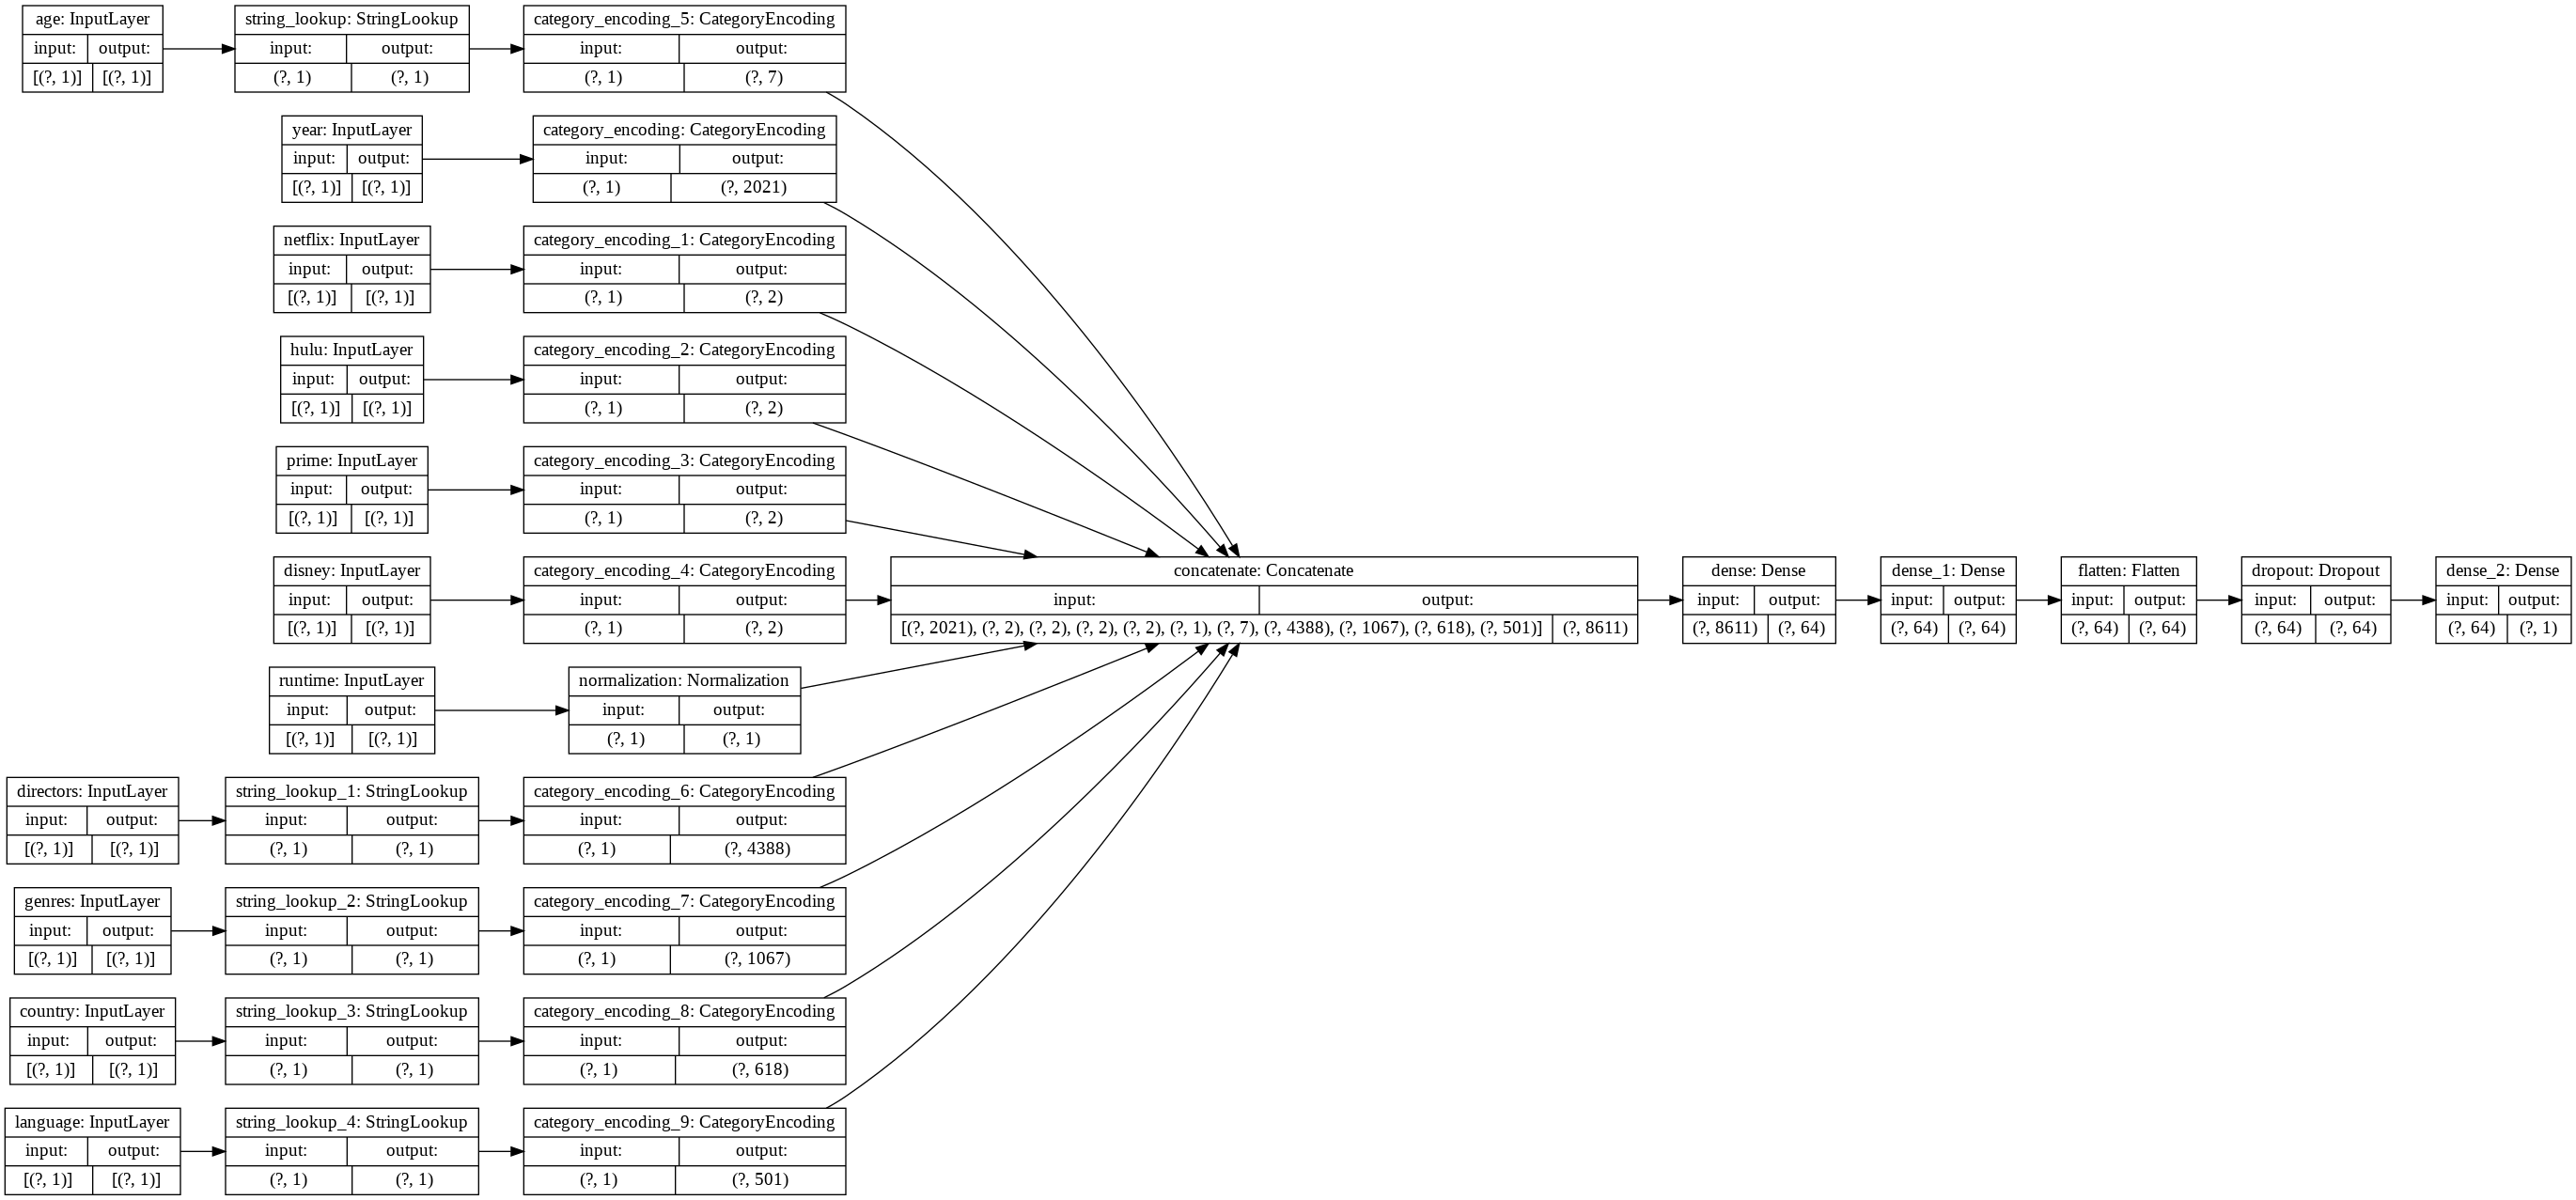

In [ ]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")





 # Redes neurais
A redes  implementada será uma  Recurrent Neural Network (RNN) com Long Short-Term Memory (LSTM) com uma arquitetura muitos para um.




In [ ]:
history = model.fit(treinoDs, epochs=50, validation_data=testeDs)

Epoch 1/50


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id', 'title'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


177/177 [==============================] - 2s 9ms/step - loss: 9.2704 - mse: 9.2704 - mae: 2.3597 - val_loss: 1.4816 - val_mse: 1.4816 - val_mae: 0.9964
Epoch 2/50
177/177 [==============================] - 1s 7ms/step - loss: 2.5789 - mse: 2.5789 - mae: 1.2850 - val_loss: 1.3522 - val_mse: 1.3522 - val_mae: 0.9364
Epoch 3/50
177/177 [==============================] - 1s 7ms/step - loss: 2.2825 - mse: 2.2825 - mae: 1.2047 - val_loss: 1.2424 - val_mse: 1.2424 - val_mae: 0.8992
Epoch 4/50
177/177 [==============================] - 1s 7ms/step - loss: 2.1205 - mse: 2.1205 - mae: 1.1575 - val_loss: 1.2932 - val_mse: 1.2932 - val_mae: 0.9007
Epoch 5/50
177/177 [==============================] - 1s 7ms/step - loss: 2.0304 - mse: 2.0304 - mae: 1.1247 - val_loss: 1.4269 - val_mse: 1.4269 - val_mae: 0.9599
Epoch 6/50
177/177 [==============================] - 1s 7ms/step - loss: 1.9028 - mse: 1.9028 - mae: 1.0954 - val_loss: 1.4097 - val_mse: 1.4097 - val_mae: 0.9571
Epoch 7/50
177/177 [=======

In [ ]:
histDf = pd.DataFrame(history.history)
display(histDf)

,loss,mse,mae,val_loss,val_mse,val_mae
0,9.270431,9.270431,2.359685,1.481617,1.481617,0.996397
1,2.578880,2.578880,1.285030,1.352193,1.352193,0.936430
2,2.282483,2.282483,1.204694,1.242393,1.242393,0.899209
3,2.120538,2.120538,1.157457,1.293200,1.293200,0.900681
4,2.030418,2.030418,1.124678,1.426888,1.426888,0.959936
5,1.902845,1.902845,1.095443,1.409657,1.409657,0.957065
6,1.766715,1.766715,1.052241,1.596938,1.596938,1.021642
7,1.728472,1.728472,1.037530,1.322531,1.322531,0.923556
8,1.636349,1.636349,1.003045,1.434142,1.434142,0.950889
9,1.655881,1.655881,1.012185,1.370650,1.370650,0.930202


In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Metrics')
  plt.plot(hist['epoch'],hist['val_loss'],label='loss')  
  plt.plot(hist['epoch'],hist['val_mae'],label = 'mae')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'mse')
  plt.ylim([0,2])
  plt.legend()
  plt.show()

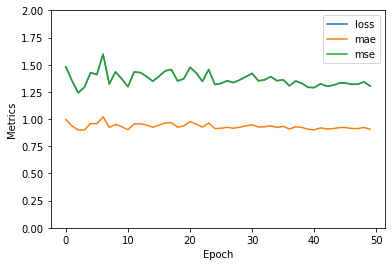

In [ ]:
plot_history(history)

In [ ]:
# Testando com o filme Inception imdb original = 8.8
sampleRec = {
    "year": 2010,
    "age": "13+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "Christopher Nolan",
    "genres": "Action,Adventure,Sci-Fi,Thriller",
    "country": "United States,United Kingdom",
    "language": "English,Japanese,French",
    "runtime": 148.0
}


#Testando com o filme Furie imdb original = 5.8
sampleNotRec = {
    "year": 2019,
    "age": "18+",
    "netflix": 1,
    "hulu": 0,
    "prime": 0,
    "disney": 0,
    "directors": "David Ayer",
    "genres": "Action,Drama,War",
    "country": "United States,China,United Kingdom",
    "language": "English,German",
    "runtime": 134.0
}

In [ ]:
type(sampleRec)

dict

In [ ]:
input_dictRec = {name: tf.convert_to_tensor([value]) for name, value in sampleRec.items()}
predictionsRec = model.predict(input_dictRec)

In [ ]:
print(
    "A nota predita para este filme é %.1f" % (predictionsRec[0][0])
)

A nota predita para este filme é 8.1


In [ ]:
input_dictNotRec = {name: tf.convert_to_tensor([value]) for name, value in sampleNotRec.items()}
predictionsNotRec = model.predict(input_dictNotRec)

In [ ]:
print(
    "A nota predita para este filme é %.1f" % (predictionsNotRec[0][0])
)

A nota predita para este filme é 5.8


In [ ]:
# Gerando um dataframe comparando 20 notas imdb do dataset com suas respectivas notas geradas pela rede neural
amostra = testeDf.sample(20).to_dict(orient='records')

resultDict = {
    "title" : [],
    "imdb" : [],
    "imdb_predict": [],
    "diff" : []
}

In [ ]:
for movie in amostra:
    resultDict["title"].append(movie["title"])
    resultDict["imdb"].append(movie["imdb"])  
    amostraInput = {name: tf.convert_to_tensor([value]) for name, value in movie.items()}
    pred = model.predict(amostraInput)
    resultDict["imdb_predict"].append( round(pred[0][0],1))     
    resultDict["diff"].append(round(movie["imdb"] - pred[0][0],1))     



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/functional.py:543: UserWarning: Input dict contained keys ['id', 'title', 'imdb'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])


In [ ]:
resultdf = pd.DataFrame(resultDict, columns = ['title', 'imdb','imdb_predict','diff'])

In [ ]:
resultdf.head(20)

,title,imdb,imdb_predict,diff
0,Shogun's Ninja,6.3,6.3,-0.0
1,Gimme Danger,7.2,7.4,-0.2
2,Beverly Hills Madam,5.6,6.1,-0.5
3,Midsommar,7.1,7.4,-0.3
4,See What I'm Saying: The Deaf Entertainers Doc...,7.3,7.1,0.2
5,The Rover,6.4,6.0,0.4
6,Our Time Will Come,6.4,6.1,0.3
7,Norman Lear: Just Another Version of You,7.2,7.4,-0.2
8,Air Marshall,2.6,6.6,-4.0
9,Inside Man: Most Wanted,5.6,6.5,-0.9



# Resultados
Após o processo de treinamento e utlizando a técnica de classificação e regressão, foi identicado que obtivemos um melhor resultado com a técnica de regressão, por esse motivo, para não ficar um notebook muito extenso 
apresentamos nessa tarefa somente esse modelo. A rede neural apresentou um melhor resultado, com quatro camada de entrada, 12 variaveis e 64 neurônios. As métricas utilizadas foram a MSE (Erro Quadrático Médio) e MAE (Erro Absoluto Médio).